## 1. Time-independent Schrodinger equation

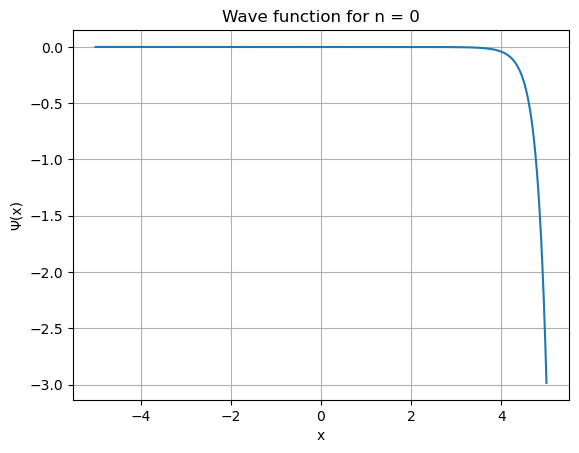

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def numerov_method(n, x_max, h):
    # Initialize x array
    x = np.arange(-x_max, x_max + h, h)
    N = len(x)

    # Initialize wave function array
    psi = np.zeros(N)

    # Set initial conditions based on whether n is even or odd
    if n % 2 == 0:
        psi[N//2] = 1.0
        psi[N//2 + 1] = 0.5
    else:
        psi[N//2] = 0.0
        psi[N//2 + 1] = 1.0

    # Energy eigenvalue
    epsilon_n = n + 0.5

    # Numerov method
    for i in range(N//2 + 1, N - 1):
        g = 2 * (epsilon_n - 0.5 * x[i]**2)
        psi[i+1] = (2 * psi[i] * (1 - 5/12 * h**2 * (2 * epsilon_n - x[i-1]**2)) - psi[i-1] * (1 + h**2/12 * (2 * epsilon_n - x[i-2]**2))) / (1 + h**2/12 * g)

    # Normalize the wave function
    psi /= np.sqrt(np.sum(psi**2) * h)

    return x, psi

# Example usage
n = 0  # Quantum number
x_max = 5.0  # Maximum value of x
h = 0.01  # Step size

x, psi = numerov_method(n, x_max, h)

# Plot the wave function
plt.plot(x, psi)
plt.xlabel('x')
plt.ylabel('Ψ(x)')
plt.title(f'Wave function for n = {n}')
plt.grid(True)
plt.show()


C:\Users\sashw\AppData\Local\Temp\ipykernel_16724\2293669370.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  prefactor = (2**n * np.math.factorial(n) * np.sqrt(np.pi)) ** (-0.5)


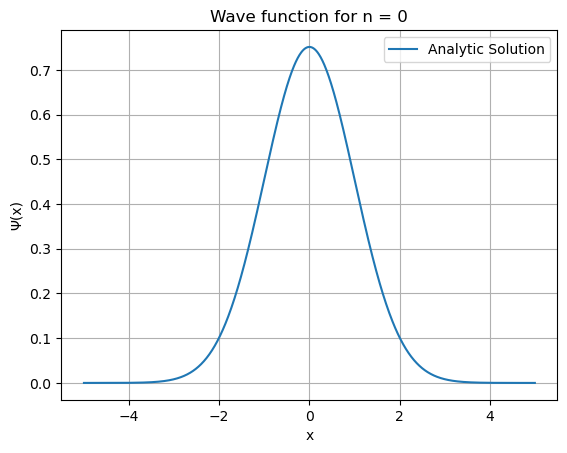

In [2]:
def hermite_polynomial(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2 * x
    else:
        Hn_minus_2 = 1
        Hn_minus_1 = 2 * x
        for i in range(2, n + 1):
            Hn = 2 * x * Hn_minus_1 - 2 * (i - 1) * Hn_minus_2
            Hn_minus_2, Hn_minus_1 = Hn_minus_1, Hn
        return Hn

def analytic_solution(n, x):
    Hn = np.array([hermite_polynomial(n, xi) for xi in x])
    prefactor = (2**n * np.math.factorial(n) * np.sqrt(np.pi)) ** (-0.5)
    return prefactor * Hn * np.exp(-x**2 / 2)

n = 0
x_max = 5.0
h = 0.01
x = np.arange(-x_max, x_max + h, h)
psi_analytic = analytic_solution(n, x)

plt.plot(x, psi_analytic, label='Analytic Solution')
plt.xlabel('x')
plt.ylabel('Ψ(x)')
plt.title(f'Wave function for n = {n}')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\sashw\AppData\Local\Temp\ipykernel_16724\269739905.py:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  prefactor = (2**n * np.math.factorial(n) * np.sqrt(np.pi)) ** (-0.5)


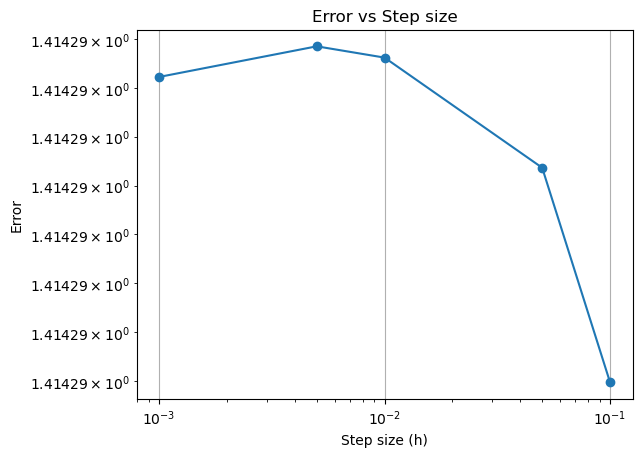

In [3]:
def hermite_polynomial(n, x):
    if n == 0:
        return 1
    elif n == 1:
        return 2 * x
    else:
        Hn_minus_2 = 1
        Hn_minus_1 = 2 * x
        for i in range(2, n + 1):
            Hn = 2 * x * Hn_minus_1 - 2 * (i - 1) * Hn_minus_2
            Hn_minus_2, Hn_minus_1 = Hn_minus_1, Hn
        return Hn

def analytic_solution(n, x):
    Hn = np.array([hermite_polynomial(n, xi) for xi in x])
    prefactor = (2**n * np.math.factorial(n) * np.sqrt(np.pi)) ** (-0.5)
    return prefactor * Hn * np.exp(-x**2 / 2)

def numerov_method(n, x_max, h):
    x = np.arange(-x_max, x_max + h, h)
    N = len(x)
    psi = np.zeros(N)

    if n % 2 == 0:
        psi[N//2] = 1.0
        psi[N//2 + 1] = 0.5
    else:
        psi[N//2] = 0.0
        psi[N//2 + 1] = 1.0

    epsilon_n = n + 0.5

    for i in range(N//2 + 1, N - 1):
        g = 2 * (epsilon_n - 0.5 * x[i]**2)
        psi[i+1] = (2 * psi[i] * (1 - 5/12 * h**2 * (2 * epsilon_n - x[i-1]**2)) - psi[i-1] * (1 + h**2/12 * (2 * epsilon_n - x[i-2]**2))) / (1 + h**2/12 * g)

    psi /= np.sqrt(np.sum(psi**2) * h)

    return x, psi

n = 0
x_max = 5.0
h_values = [0.1, 0.05, 0.01, 0.005, 0.001]
errors = []

for h in h_values:
    x, psi_numerov = numerov_method(n, x_max, h)
    psi_analytic = analytic_solution(n, x)

    # Interpolate the analytic solution to match the numerical solution's x values
    psi_analytic_interp = np.interp(x, x, psi_analytic)

    # Calculate the error
    error = np.sqrt(np.sum((psi_numerov - psi_analytic_interp)**2) * h)
    errors.append(error)

# Plot the error as a function of step size
plt.loglog(h_values, errors, marker='o')
plt.xlabel('Step size (h)')
plt.ylabel('Error')
plt.title('Error vs Step size')
plt.grid(True)
plt.show()
